## Evaluating Performance of a Regressor
Regression Model produces numeric output.

<i>How much is my home worth?</i>

<i>How many passengers are going to travel by air this year?</i>


To find out how good the model predictions are, we need to check predictions against previously unseen samples that were not used for training.  Usually, 30% of the available samples are reserved for testing while remaining 70% of samples are used for training. 

By comparing predicted values against known results in test data, we can assess overall model performance<br>

Common Techniques for evaluating performance:<br>
<li>Visually observe using Plots</li>
<li>Residual Histograms</li>
<li>Evaluate with Metrics like Root Mean Square Error (RMSE)</li> 

<p>While Plots are good for humans to visually observe the results, we often need a single metric that can indicate quality of a model. This can be useful for programmatically identifying which model is performing better (for example: using automatic model tuning to select the best performing model)</p>

Reference:<br>https://docs.aws.amazon.com/machine-learning/latest/dg/evaluating-model-accuracy.html<br>
RMSE:<br>https://en.wikipedia.org/wiki/Root-mean-square_deviation<br>
Mean Absolute Error:<br>https://en.wikipedia.org/wiki/Mean_absolute_error<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

<h2>Air Passengers Data</h2>
<h3>Columns</h3>
<li>Passengers = Actual Number of passengers who traveled by air</li>
<li>Model1_Prediction = Number of Passengers predicted by model 1</li>
<li>Model2_Prediction = Number of Passengers predicted by model 2</li>
<li>Model3_Prediction = Number of Passengers predicted by model 3</li>
<li>Model4_Prediction = Number of Passengers predicted by model 4</li>
<p>We are going to compare performance of these four models</p>

World Bank Air Traffic Passengers Dataset:<br>
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD<br>
https://data.worldbank.org/indicator/SP.POP.TOTL

In [5]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df_air = pd.read_csv('airpassengers_sample.csv',index_col=0)

In [7]:
df_air

,GDP,Population,Passengers,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
Year,,,,,,,
2008,14.72,304.09,701.78,710,701,850,750
2009,14.42,306.77,679.42,650,670,450,750
2010,14.96,309.34,720.50,700,715,1000,750
2011,15.52,311.64,730.80,750,735,550,750
2012,16.16,313.99,736.70,769,740,700,750
2013,16.69,316.23,743.17,800,740,900,750
2014,17.43,318.62,762.71,745,760,1100,750
2015,18.12,321.04,798.22,780,790,1200,750
2016,18.62,323.41,824.04,800,825,1500,750


## Plot Data
Compare performance visually <br>

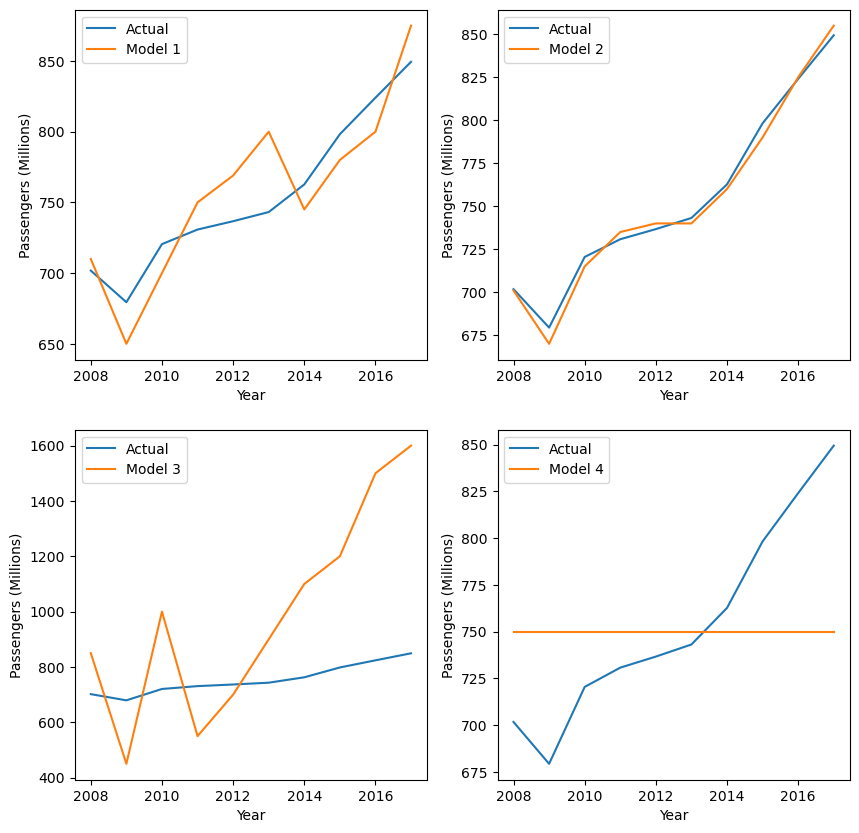

In [8]:
plt.figure(figsize=(10,10))

# Plot Actual versus predictions by each model
# We are going to draw 4 plots in a 2 x 2 grid
# 221 = 2 rows, 2 columns, 1st sub plot
# 222 = 2 rows, 2 columns, 2nd sub plot
# and so forth

# Model 1
plt.subplot(221)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model1_Prediction'],label='Model 1')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 2
plt.subplot(222)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model2_Prediction'],label='Model 2')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 3
plt.subplot(223)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model3_Prediction'],label='Model 3')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 4
plt.subplot(224)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model4_Prediction'],label='Model 4')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

plt.show()

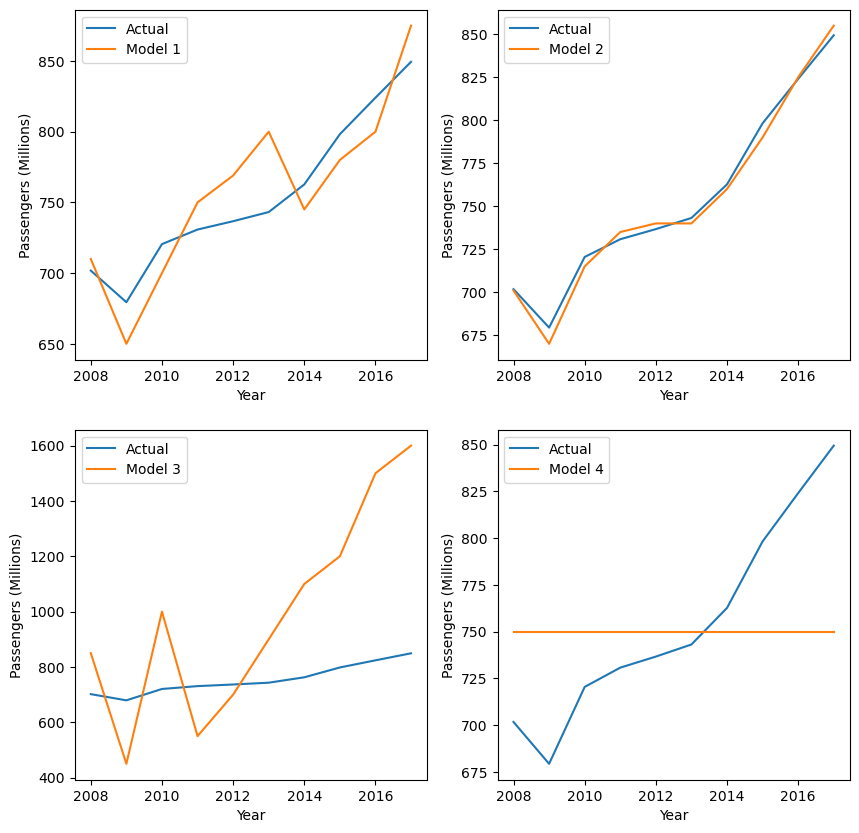

In [9]:
# Same plot as above...more concise code
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    plt.plot(df_air['Passengers'], label='Actual')
    plt.plot(df_air[model.replace(' ','') + '_Prediction'],
             label=model)
    plt.xlabel('Year')
    plt.ylabel('Passengers (Millions)')
    plt.legend()

<p>From the plots, we can observe that Model 1 and Model 2 appears to be pretty close to actuals. Model 3 plot is not matching with actuals. Model 4 is predicting a constant value<p>

## Root Mean Square Error (RMSE)
Compares Actual and Predicted values and arrives at a single metric.<br>
Smaller RMSE value indicates better predictive quality. <br>
Let's compute the RMSE metric for each of the models

In [10]:
# RMSE
for model in models:
    print (model)
    mse = mean_squared_error(df_air['Passengers'], 
                             df_air[model.replace(' ','') + '_Prediction'])
    print(" Mean Squared Error: {0:.2f}".format(mse))
    print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Model 1
 Mean Squared Error: 787.38
 Root Mean Square Error: 28.06
Model 2
 Mean Squared Error: 26.54
 Root Mean Square Error: 5.15
Model 3
 Mean Squared Error: 150686.81
 Root Mean Square Error: 388.18
Model 4
 Mean Squared Error: 2661.81
 Root Mean Square Error: 51.59


We can confirm using RMSE that Model 2 produces best outcome

## Residual Histograms
"A residual for an observation in the evaluation data is the difference between the true target and the predicted target.  The histogram of the residuals on the evaluation data when distributed in a bell shape and centered at zero indicates that the model makes mistakes in a random manner and does not systematically over or under predict any particular range of target values"<br>
Reference: https://docs.aws.amazon.com/machine-learning/latest/dg/regression-model-insights.html

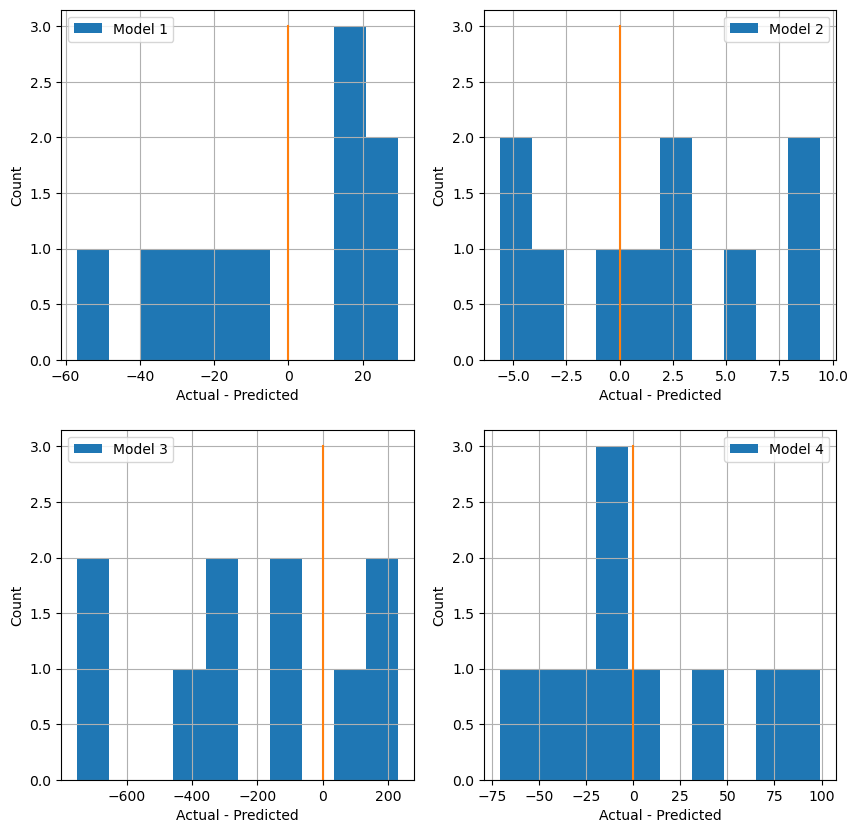

In [11]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    residual = df_air['Passengers'] - df_air[model.replace(' ','') + '_Prediction']
        
    plt.hist(residual,
             label=model)
    plt.plot([0,0],[0,3])
    plt.xlabel('Actual - Predicted')
    plt.ylabel('Count')
    plt.grid()
    plt.legend()

In [12]:
# Let's print actual counts
# How many under predictions and over predictions
# Actual - Predicted
# Positive Value indicates Actual is more than predicted (under estimation)
# Negative Value indicates Actual is less than predicted (over estimation)
# Since our test dataset has only 10 samples, it hard to find patterns.
# But, even here, Model 3 appears to be different from other models
# as it over predicting for larger number of samples

for model in models:
    print (model)
    residual = df_air['Passengers'] - df_air[model.replace(' ','') + '_Prediction']
    # Count number of values greater than zero and less than zero
    value_counts = (residual > 0).value_counts(sort=False)
    
    print(' Under Estimation: ', value_counts[True]) # difference is greater than 0
    print(' Over  Estimation: ',  value_counts[False]) # difference is less than 0

Model 1
 Under Estimation:  5
 Over  Estimation:  5
Model 2
 Under Estimation:  6
 Over  Estimation:  4
Model 3
 Under Estimation:  3
 Over  Estimation:  7
Model 4
 Under Estimation:  4
 Over  Estimation:  6


<h2>Summary</h2>
In this example, Model 2 has the best performance followed by Model 1.

We can confirm this by visual observation using plots and by comparing RMSE metrics